In [20]:
import pandas as pd
import json
import os
import re

In [21]:
pickle_files = [
    "./data/Sonnet-2.pkl.pkl",
    "./data/gpt-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]
pickle_files = [
    "./data/Sonnet-2.pkl",
    "./data/GPT-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df = pd.concat(dfs)

In [22]:
df.to_csv("./all-2.csv")

In [25]:
wrong_sonnect = df[(df["Model"] == "Sonnet") & (df["is_prediction_correct"] == False)]

In [26]:
wrong_sonnect

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,gemini-output-file,gemini-output-raw
50,Acknowledgement,fonts/Helvetica.ttf,4,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,n,o,False,Acknowledgement,Sonnet,NaN,NaN
52,Acknowledgement,fonts/Helvetica.ttf,4,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""n"" in the word ""Ackn...",n,o,False,Acknowledgement,Sonnet,NaN,NaN
54,Acknowledgement,fonts/Helvetica.ttf,4,5,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,n,o,False,Acknowledgement,Sonnet,NaN,NaN
58,Acknowledgement,fonts/Helvetica.ttf,4,6,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,n,o,False,Acknowledgement,Sonnet,NaN,NaN
74,Acknowledgement,fonts/Helvetica.ttf,6,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""o"" in the word ""Ackn...",o,l,False,Acknowledgement,Sonnet,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,m,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,NaN
1225,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,z,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,NaN
1228,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,5,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,z,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,NaN
1232,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,6,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,NaN


The character being highlighted with a red oval in the text "tHyUiKaRbNqWeOpXcZvM" is the lowercase letter "i".


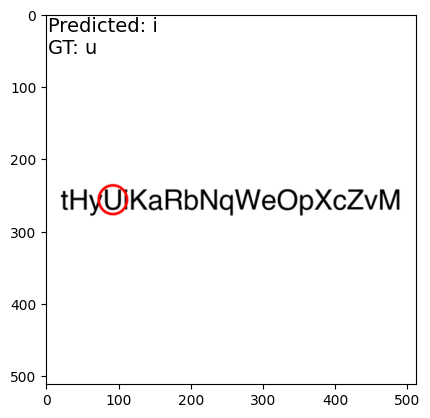

In [56]:
# Let's preview some smaples Show the image from  image_path, and predicted and gt in one matplotlib figure
randome_sample = wrong_sonnect.sample(n=1)
randome_sample

from matplotlib import pyplot as plt
from PIL import Image


plt.imshow(Image.open(randome_sample["image_path"].iloc[0]))
# add text to show predicted and gt
plt.text(
    1.9,
    2.75,
    f"Predicted: {randome_sample['predicted'].iloc[0]}\nGT: {randome_sample['gt'].iloc[0]}",
    ha="left",
    va="top",
    fontsize=14,
)
print(randome_sample["model-output-raw"].iloc[0])
plt.show()

In [3]:
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model and word, then calculate the accuracy
accuracy_per_model_and_word = df.groupby(["Model", "word"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

print(accuracy_per_model_and_word)

Model           word                
GPT-4o          Acknowledgement         69.30
                Subdermatoglyphic       63.50
                tHyUiKaRbNqWeOpXcZvM    77.36
Gemini-1.5-Pro  Acknowledgement         96.67
                Subdermatoglyphic       90.69
                tHyUiKaRbNqWeOpXcZvM    86.88
Sonnet          Acknowledgement         81.11
                Subdermatoglyphic       70.83
                tHyUiKaRbNqWeOpXcZvM    65.62
Name: is_prediction_correct, dtype: float64


In [8]:
# calcualte accuracy per model on all words
accuracy_per_model = df.groupby("Model")["is_prediction_correct"].mean()
accuracy_per_model = accuracy_per_model * 100
accuracy_per_model = accuracy_per_model.round(2)
print(accuracy_per_model)

Model
GPT-4o            70.54
Gemini-1.5-Pro    90.95
Sonnet            71.79
Name: is_prediction_correct, dtype: float64


In [4]:
print(accuracy_per_model_and_word.to_latex())

\begin{tabular}{llr}
\toprule
 &  & is_prediction_correct \\
Model & word &  \\
\midrule
\multirow[t]{3}{*}{GPT-4o} & Acknowledgement & 69.300000 \\
 & Subdermatoglyphic & 63.500000 \\
 & tHyUiKaRbNqWeOpXcZvM & 77.360000 \\
\cline{1-3}
\multirow[t]{3}{*}{Gemini-1.5-Pro} & Acknowledgement & 96.670000 \\
 & Subdermatoglyphic & 90.690000 \\
 & tHyUiKaRbNqWeOpXcZvM & 86.880000 \\
\cline{1-3}
\multirow[t]{3}{*}{Sonnet} & Acknowledgement & 81.110000 \\
 & Subdermatoglyphic & 70.830000 \\
 & tHyUiKaRbNqWeOpXcZvM & 65.620000 \\
\cline{1-3}
\bottomrule
\end{tabular}



In [5]:
# get average per model
accuracy_per_model_and_word.groupby("Model").mean()

Model
GPT-4o            70.053333
Gemini-1.5-Pro    91.413333
Sonnet            72.520000
Name: is_prediction_correct, dtype: float64

In [6]:
# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

accuracy_per_model_word_font

Model           word                  font_path                                
GPT-4o          Acknowledgement       fonts/Helvetica.ttf                          68.75
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    69.83
                Subdermatoglyphic     fonts/Helvetica.ttf                          65.15
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    61.88
                tHyUiKaRbNqWeOpXcZvM  fonts/Helvetica.ttf                          80.33
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    74.37
Gemini-1.5-Pro  Acknowledgement       fonts/Helvetica.ttf                          94.44
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    98.89
                Subdermatoglyphic     fonts/Helvetica.ttf                          89.71
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    91.67
                tHyUiKaRbNqWeO

In [7]:
print(accuracy_per_model_word_font.to_latex())

\begin{tabular}{lllr}
\toprule
 &  &  & is_prediction_correct \\
Model & word & font_path &  \\
\midrule
\multirow[t]{6}{*}{GPT-4o} & \multirow[t]{2}{*}{Acknowledgement} & fonts/Helvetica.ttf & 68.750000 \\
 &  & fonts/OpenSans-VariableFont_wdth,wght.ttf & 69.830000 \\
\cline{2-4}
 & \multirow[t]{2}{*}{Subdermatoglyphic} & fonts/Helvetica.ttf & 65.150000 \\
 &  & fonts/OpenSans-VariableFont_wdth,wght.ttf & 61.880000 \\
\cline{2-4}
 & \multirow[t]{2}{*}{tHyUiKaRbNqWeOpXcZvM} & fonts/Helvetica.ttf & 80.330000 \\
 &  & fonts/OpenSans-VariableFont_wdth,wght.ttf & 74.370000 \\
\cline{1-4} \cline{2-4}
\multirow[t]{6}{*}{Gemini-1.5-Pro} & \multirow[t]{2}{*}{Acknowledgement} & fonts/Helvetica.ttf & 94.440000 \\
 &  & fonts/OpenSans-VariableFont_wdth,wght.ttf & 98.890000 \\
\cline{2-4}
 & \multirow[t]{2}{*}{Subdermatoglyphic} & fonts/Helvetica.ttf & 89.710000 \\
 &  & fonts/OpenSans-VariableFont_wdth,wght.ttf & 91.670000 \\
\cline{2-4}
 & \multirow[t]{2}{*}{tHyUiKaRbNqWeOpXcZvM} & fonts/Helveti